In [1]:
import re
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
import tensorflow as tf

from wordcloud import WordCloud
from tensorflow.keras import layers, models, losses, Sequential, optimizers, metrics

In [2]:
import tensorflow

print(tensorflow.__version__)

2.15.0


In [3]:
import keras

print(keras.__version__)

2.15.0


In [4]:
pip install seaborn -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [5]:
import seaborn as sns

print(sns.__version__)

0.13.2


In [6]:
tweets_data = pd.read_csv("Tweets.csv")

tweets_data.sample(10)

,textID,text,selected_text,sentiment
784,28f67f674e,oh no....u don`t have to hit him up. He had a...,oh no....u don`t have to hit him up. He had a ...,neutral
26864,b3fff2e516,Dahh- I do believe it`s time for bed. G`night,Dahh- I do believe it`s time for bed. G`night,neutral
21545,6357cd7293,I tried both. is unstoppable.,I tried both. is unstoppable.,neutral
23812,ba4c211b94,: http://tinyurl.com/c6tvz5 Germany loves you...,"Germany loves you,",positive
10166,7d093817af,LOL. You know me. I aim to please.,I aim to please.,positive
1778,95828aebf3,Missing nathan and the bccg already. And my be...,Missing nathan and the bccg already.,negative
21142,3e01dc864a,GRRRR!!! It`s BACK!!!!! And what I mean is my ...,GRRRR!!,negative
14154,04b6314652,I`ma say you should smudge yourself before I ...,I start calling people given the malicious act...,negative
6587,770f50c71c,my little booboo is sick,my little booboo is sick,negative
5086,454507235e,I cant watch anythgin till tonight,I cant watch anythgin till tonight,neutral


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [9]:
tweets_data.isnull().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

In [10]:
tweets_data = tweets_data.dropna()

tweets_data.isnull().sum()

textID           0
text             0
selected_text    0
sentiment        0
dtype: int64

In [11]:
tweets_data.duplicated().sum()

0

In [12]:
tweets_data = tweets_data.drop(columns = ["selected_text", "textID"])

tweets_data.sample(10)

,text,sentiment
12272,Greg Pritchard was robbed ii am too gutted fo...,negative
17768,is in a good mood,positive
2616,sorry for taking over twitter with my i-can`t-...,negative
4102,Had to cancel subscriptions today to NZZ and E...,neutral
11198,chale... a ver define 'out',neutral
15957,Chillin with the roomies. Can`t wait for the z...,neutral
1343,4 more followers.. follow me and I`ll love you...,positive
1264,_ray Bright Eyes=Contentment,positive
20371,Getting my hair cut tomorrow or later today I ...,positive
12512,Margaritas with my Momo. I`ve missed her.,negative


In [13]:
tweets_data["sentiment"].value_counts()

sentiment
neutral     11117
positive     8582
negative     7781
Name: count, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

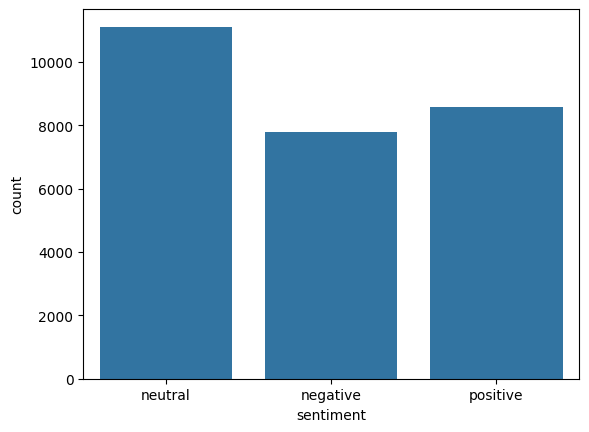

In [14]:
import seaborn as sns

sns.countplot(data = tweets_data, x = "sentiment")

In [15]:
tweets_data["word_count"] = tweets_data["text"].apply(lambda x: len(str(x).split(" ")))

tweets_data[["text", "word_count"]].sample(10)

,text,word_count
1103,okie gonna tweet more because i am loosing you...,12
1988,please check out www.mysweetebony.com and lmk ...,20
14838,Haha most def ^__^ Rob a bank with me so i co...,21
1677,oops too late,4
26010,aww... try to rest na lang muna... ^^,10
22761,"unfort, i can`t DM you b/c ur not following me",11
666,nice one !,4
15479,Going to for lunch today with . Who`s in? I s...,17
27337,Looking for desktop twitter app that will actu...,20
18448,Education doesn`t move forward because we keep...,11


In [16]:
tweets_data.groupby("sentiment")["word_count"].mean()

sentiment
negative    14.244313
neutral     13.207610
positive    14.100210
Name: word_count, dtype: float64

In [17]:
tweets_data.groupby("sentiment")["word_count"].median()

sentiment
negative    13.0
neutral     12.0
positive    13.0
Name: word_count, dtype: float64

<Axes: xlabel='word_count', ylabel='Count'>

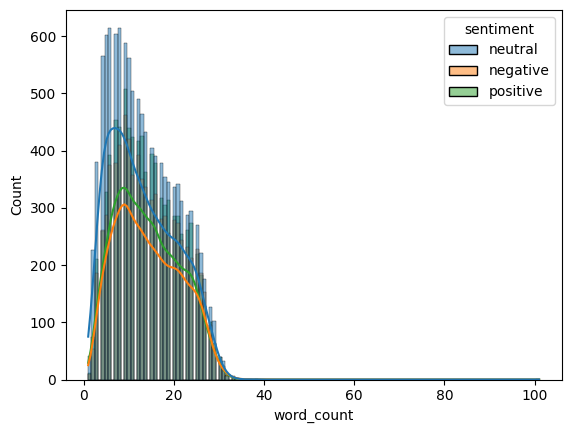

In [18]:
sns.histplot(data = tweets_data, x = "word_count", hue = "sentiment", kde = True)

<Axes: ylabel='word_count'>

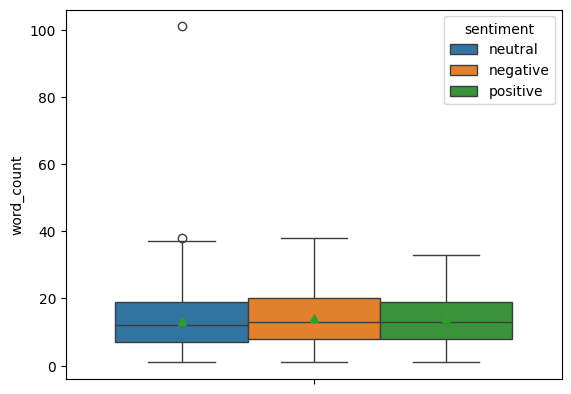

In [19]:
sns.boxplot(data = tweets_data, y = "word_count", hue = "sentiment", showmeans = True)

In [20]:
from nltk.corpus import stopwords

nltk.download("stopwords")

stop_words = stopwords.words("english")

print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
import string

def custom_standardization(input_data):

    # Convert to lowercase
    lowercase = tf.strings.lower(input_data)

    # Remove URLs
    stripped_urls = tf.strings.regex_replace(lowercase, r"https?://\S+|www\.\S+", "")

    # Remove email addresses
    stripped_symbol = tf.strings.regex_replace(stripped_urls, "\S*@\S*\s?", "")

    # Remove text in angular brackets (usually HTML tags)
    stripped_brackets = tf.strings.regex_replace(stripped_symbol, "<.*?>+", "")

    # Remove any square brackets and leave the text within square brackets
    stripped_brackets = tf.strings.regex_replace(stripped_brackets, "\[|\]", "")

    # Matches alphanumeric characters with digits and remove those
    stripped_digits = tf.strings.regex_replace(stripped_brackets, "\w*\d\w*", "")

    # Remove stopwords
    stripped_stopwords = tf.strings.regex_replace(stripped_digits, r"\b(?:{})\b".format("|".join(stop_words)), "")

    # Replace multiple whitespaces with a single whitespace
    stripped_whitespace_chars = tf.strings.regex_replace(stripped_stopwords, "\s+", " ")

    # Remove non-alphabet characters
    return tf.strings.regex_replace(stripped_whitespace_chars ,r"[^a-zA-Z\s]+" ,"")

In [22]:
tweets_data["text"][4]

' Sons of ****, why couldn`t they put them on the releases we already bought'

In [23]:
custom_standardization(tweets_data["text"][4]).numpy()

b' sons   put releases already bought'

In [24]:
tweets_data["text"][20]

' oh Marly, I`m so sorry!!  I hope you find her soon!! <3 <3'

In [25]:
custom_standardization(tweets_data["text"][20]).numpy()

b' oh marly  sorry hope find soon  '

In [26]:
tweets_data["text"][527]

'i am living in ignorance  :@'

In [27]:
custom_standardization(tweets_data["text"][527]).numpy()

b' living ignorance '

In [28]:
tweets_data["cleaned_text"] = tweets_data["text"].apply(custom_standardization)

tweets_data

,text,sentiment,word_count,cleaned_text
0,"I`d have responded, if I were going",neutral,8,"tf.Tensor(b' responded going', shape=(), dtyp..."
1,Sooo SAD I will miss you here in San Diego!!!,negative,11,"tf.Tensor(b' sooo sad miss san diego', shape=(..."
2,my boss is bullying me...,negative,5,"tf.Tensor(b' boss bullying ', shape=(), dtype=..."
3,what interview! leave me alone,negative,6,"tf.Tensor(b' interview leave alone', shape=(),..."
4,"Sons of ****, why couldn`t they put them on t...",negative,15,tf.Tensor(b' sons put releases already bough...
...,...,...,...,...
27476,wish we could come see u on Denver husband l...,negative,18,tf.Tensor(b' wish could come see u denver husb...
27477,I`ve wondered about rake to. The client has ...,negative,26,tf.Tensor(b' wondered rake client made clear...
27478,Yay good for both of you. Enjoy the break - y...,positive,24,tf.Tensor(b' yay good enjoy break probably n...
27479,But it was worth it ****.,positive,8,"tf.Tensor(b' worth ', shape=(), dtype=string)"


In [29]:
# Define a function to convert tensor to string
def tensor_to_string(tensor):
    return tensor.numpy().decode("utf-8")  # Assuming utf-8 encoding

# Apply the function to the DataFrame column
tweets_data["cleaned_text"] = tweets_data["cleaned_text"].apply(tensor_to_string)

tweets_data

,text,sentiment,word_count,cleaned_text
0,"I`d have responded, if I were going",neutral,8,responded going
1,Sooo SAD I will miss you here in San Diego!!!,negative,11,sooo sad miss san diego
2,my boss is bullying me...,negative,5,boss bullying
3,what interview! leave me alone,negative,6,interview leave alone
4,"Sons of ****, why couldn`t they put them on t...",negative,15,sons put releases already bought
...,...,...,...,...
27476,wish we could come see u on Denver husband l...,negative,18,wish could come see u denver husband lost job...
27477,I`ve wondered about rake to. The client has ...,negative,26,wondered rake client made clear net force...
27478,Yay good for both of you. Enjoy the break - y...,positive,24,yay good enjoy break probably need hectic w...
27479,But it was worth it ****.,positive,8,worth


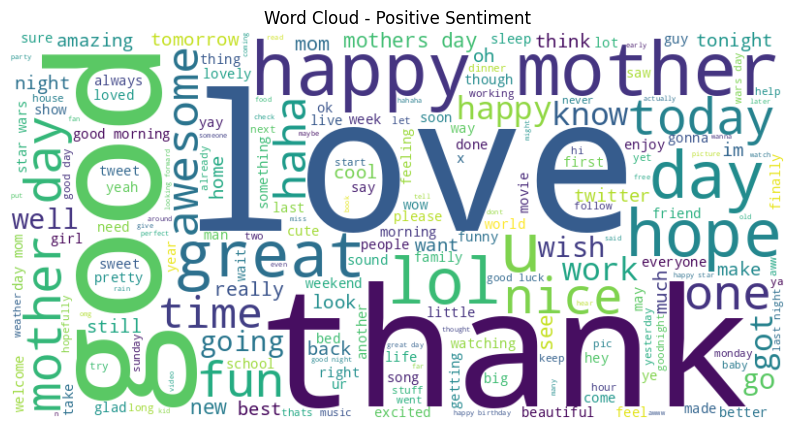

In [30]:
# Extract the text from positive sentiment tweets
positive_tweets = tweets_data[tweets_data["sentiment"] == "positive"]["cleaned_text"]

# Concatenate all the positive sentiment tweets into a single string
positive_text = " ".join(positive_tweets)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 400, background_color = "white").generate(positive_text)

# Plot the WordCloud
plt.figure(figsize = (10, 6))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.title("Word Cloud - Positive Sentiment")
plt.show()

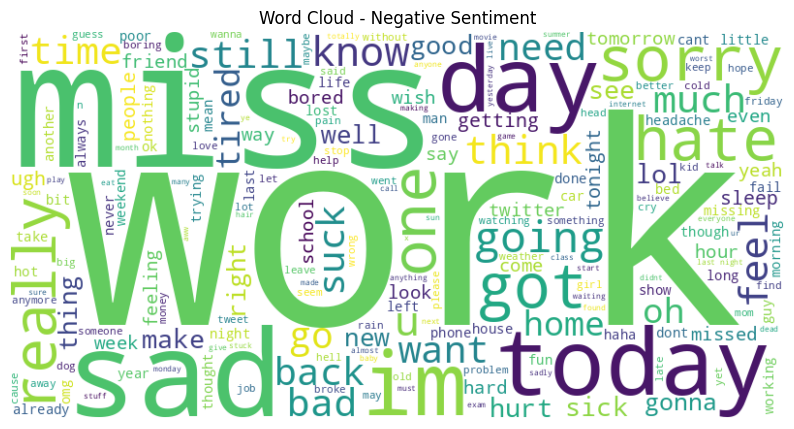

In [31]:
# Extract the text from negative sentiment tweets
negative_tweets = tweets_data[tweets_data["sentiment"] == "negative"]["cleaned_text"]

# Concatenate all the negative sentiment tweets into a single string
negative_text = " ".join(negative_tweets)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 400, background_color = "white").generate(negative_text)

# Plot the WordCloud
plt.figure(figsize = (10, 6))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.title("Word Cloud - Negative Sentiment")
plt.show()

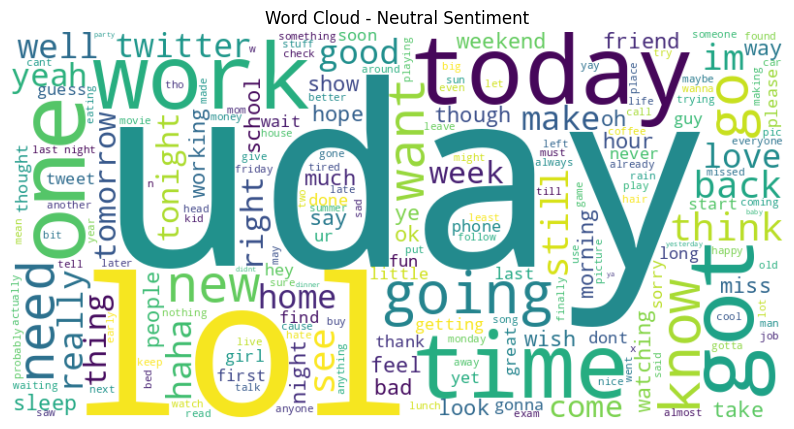

In [32]:
# Extract the text from neutral sentiment tweets
neutral_tweets = tweets_data[tweets_data["sentiment"] == "neutral"]["cleaned_text"]

# Concatenate all the neutral sentiment tweets into a single string
neutral_tweets = " ".join(neutral_tweets)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 400, background_color = "white").generate(neutral_tweets)

# Plot the WordCloud
plt.figure(figsize = (10, 6))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.title("Word Cloud - Neutral Sentiment")
plt.show()

In [33]:
tweets_data["sentiment"] = tweets_data["sentiment"].replace({"negative": 0, "neutral": 1, "positive": 2})

tweets_data.sample(10)

,text,sentiment,word_count,cleaned_text
25704,lol well i learned somethin new thx !,2,10,lol well learned somethin new thx
14745,peter!! follow me!! oh and have fun in europe!,2,10,peter follow oh fun europe
22561,There is something wrong with me! I`m so tired...,0,30,something wrong tired barely keep eyes open...
2022,Im had to leave early to go to piccolo practice.,1,10,im leave early go piccolo practice
8435,relaxing fragrances are SOO IN! my latest love...,2,22,relaxing fragrances soo latest loves still la...
12438,decent Australian guys are hard to find...tru...,1,16,decent australian guys hard findtrust bette...
8108,definitely ready for a plate of pancakes.,2,7,definitely ready plate pancakes
19510,i can be a good girl at school.. today i was!!...,2,15,good girl school today yayy
21186,_richards sorry to be the bearer of bad news.,0,9,richards sorry bearer bad news
14173,"iya, nyokap gue pernah berkata demikian :-| ...",0,19,iya nyokap gue pernah berkata demikian hard...


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(tweets_data, test_size = 0.2, stratify = tweets_data["sentiment"], random_state = 123)
X_train, X_val = train_test_split(X_train, test_size = 0.1, stratify = X_train["sentiment"], random_state = 123)

X_train.shape, X_val.shape, X_test.shape

((19785, 4), (2199, 4), (5496, 4))

In [35]:
X_train["sentiment"].value_counts()

sentiment
1    8005
2    6178
0    5602
Name: count, dtype: int64

In [36]:
X_val["sentiment"].value_counts()

sentiment
1    889
2    687
0    623
Name: count, dtype: int64

In [37]:
raw_train_ds = tf.data.Dataset.from_tensor_slices(
    (X_train["text"].values, X_train["sentiment"].values)).shuffle(1024).batch(batch_size = 128)

raw_val_ds = tf.data.Dataset.from_tensor_slices(
    (X_val["text"].values, X_val["sentiment"].values)).batch(batch_size = 128)

raw_test_ds = tf.data.Dataset.from_tensor_slices(
    (X_test["text"].values, X_test["sentiment"].values)).batch(batch_size = 128)

len(raw_train_ds), len(raw_val_ds), len(raw_test_ds)

(155, 18, 43)

In [38]:
vocab_size = 30

count_vectorizer = layers.TextVectorization(
    standardize = "lower_and_strip_punctuation",
    max_tokens = vocab_size,
    output_mode = "count",
)

In [39]:
# list of text documents
text = ["Malcolm is an amazing painter. Malcolm also loves watching cricket",
        "Dean cooks well",
        "Malcolm is a decent footballer too",
        "Chris is a teacher, he is quite experienced in teaching"]

In [40]:
count_vectorizer.adapt(text)

In [41]:
count_vectorizer.get_vocabulary()

['[UNK]',
 'is',
 'malcolm',
 'a',
 'well',
 'watching',
 'too',
 'teaching',
 'teacher',
 'quite',
 'painter',
 'loves',
 'in',
 'he',
 'footballer',
 'experienced',
 'decent',
 'dean',
 'cricket',
 'cooks',
 'chris',
 'an',
 'amazing',
 'also']

In [42]:
count_vectorizer(text)

<tf.Tensor: shape=(4, 24), dtype=float32, numpy=
array([[0., 1., 2., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 2., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1.,
        0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)>

In [43]:
vocab_size = 10000

count_vectorizer = layers.TextVectorization(
    standardize = custom_standardization,
    max_tokens = vocab_size,
    output_mode = "count",
    ngrams = (1, 2)
)

In [44]:
# Make a text-only dataset (without labels), then call adapt

train_text = raw_train_ds.map(lambda x, y: x)

count_vectorizer.adapt(train_text)

In [45]:
def vectorize_text(text, label):
    # Shape () => (1, )
    text = tf.expand_dims(text, -1)

    return count_vectorizer(text), label

In [46]:
import sys
np.set_printoptions(threshold = sys.maxsize)

class_names = ["negative", "neutral", "positive"]
text_batch, label_batch = next(iter(raw_train_ds))
first_tweet, first_label = text_batch[0], label_batch[0]

print("Tweet: ", first_tweet)
print("Sentiment: ", class_names[first_label])
print("Vectorized review: ", vectorize_text(first_tweet, first_label))

Tweet:  tf.Tensor(b' Trending you say? Well, there`s TweetCannon   http://tinyurl.com/odrza4', shape=(), dtype=string)
Sentiment:  neutral
Vectorized review:  (<tf.Tensor: shape=(1, 10000), dtype=float32, numpy=
array([[4., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [47]:
count_vectorizer.get_vocabulary()

['[UNK]',
 'day',
 'good',
 'get',
 'like',
 'go',
 'today',
 'love',
 'going',
 'work',
 'got',
 'one',
 'time',
 'lol',
 'know',
 'happy',
 'u',
 'really',
 'back',
 'im',
 'see',
 'night',
 'new',
 'home',
 'think',
 'want',
 'well',
 'oh',
 'much',
 'still',
 'thanks',
 'miss',
 'great',
 'last',
 'need',
 'morning',
 'haha',
 'hope',
 'would',
 'feel',
 'fun',
 'tomorrow',
 'sorry',
 'twitter',
 'wish',
 'bad',
 'make',
 'tonight',
 'sad',
 'right',
 'week',
 'yeah',
 'nice',
 'way',
 'mother',
 'gonna',
 'though',
 'better',
 'sleep',
 'could',
 'weekend',
 'come',
 'next',
 'people',
 'bed',
 'getting',
 'mothers',
 'wait',
 'watching',
 'mother day',
 'hate',
 'days',
 'say',
 'awesome',
 'thing',
 'school',
 'dont',
 'even',
 'mom',
 'soon',
 'yes',
 'long',
 'little',
 'show',
 'best',
 'working',
 'sure',
 'never',
 'ok',
 'thank',
 'done',
 'mothers day',
 'tired',
 'hey',
 'cool',
 'feeling',
 'take',
 'cant',
 'happy mother',
 'everyone',
 'look',
 'first',
 'please',
 'l

In [48]:
vocab_size =  len(count_vectorizer.get_vocabulary())

vocab_size

10000

In [49]:
print("44   ---> ", count_vectorizer.get_vocabulary()[44])
print("80   ---> ", count_vectorizer.get_vocabulary()[80])
print("160  ---> ", count_vectorizer.get_vocabulary()[160])

44   --->  wish
80   --->  yes
160  --->  someone


In [50]:
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

In [51]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [52]:
dnn_model = Sequential([
    layers.Dense(64, activation = "tanh"),
    layers.Dropout(0.1),
    layers.Dense(32, activation = "tanh"),
    layers.Dropout(0.1),
    layers.Dense(3)
])

In [53]:
dnn_model.compile(
    loss = losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = optimizers.Adam(learning_rate = 0.0001),
    metrics = ["accuracy"]
)

input_shape = (None, 10000)

dnn_model.build(input_shape)

dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640064    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 642243 (2.45 MB)
Trainable params: 642243 (2.45 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
history = dnn_model.fit(
    train_ds,
    epochs = 10,
    validation_data = val_ds)

Epoch 1/10
155/155 [==============================] - 4s 24ms/step - loss: 1.0754 - accuracy: 0.4383 - val_loss: 1.0408 - val_accuracy: 0.4889
Epoch 2/10
155/155 [==============================] - 3s 18ms/step - loss: 0.9987 - accuracy: 0.5573 - val_loss: 0.9650 - val_accuracy: 0.5903
Epoch 3/10
155/155 [==============================] - 2s 13ms/step - loss: 0.8958 - accuracy: 0.6583 - val_loss: 0.8816 - val_accuracy: 0.6385
Epoch 4/10
155/155 [==============================] - 1s 10ms/step - loss: 0.7916 - accuracy: 0.7093 - val_loss: 0.8191 - val_accuracy: 0.6717
Epoch 5/10
155/155 [==============================] - 2s 10ms/step - loss: 0.7071 - accuracy: 0.7397 - val_loss: 0.7817 - val_accuracy: 0.6835
Epoch 6/10
155/155 [==============================] - 2s 14ms/step - loss: 0.6417 - accuracy: 0.7627 - val_loss: 0.7631 - val_accuracy: 0.6876
Epoch 7/10
155/155 [==============================] - 2s 15ms/step - loss: 0.5911 - accuracy: 0.7837 - val_loss: 0.7571 - val_accuracy: 0.6908

In [55]:
loss, accuracy = dnn_model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

43/43 [==============================] - 0s 6ms/step - loss: 0.7972 - accuracy: 0.6818
Loss:  0.7971616983413696
Accuracy:  0.681768536567688


In [56]:
history_dict = history.history

history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [57]:
history_dict

{'loss': [1.0754061937332153,
  0.9986922144889832,
  0.8958075642585754,
  0.7916123867034912,
  0.7070549726486206,
  0.6416659951210022,
  0.5911200642585754,
  0.5470126867294312,
  0.508836030960083,
  0.4768630564212799],
 'accuracy': [0.4383118450641632,
  0.5573413968086243,
  0.6582764983177185,
  0.7092747092247009,
  0.7396512627601624,
  0.7626990079879761,
  0.7837250232696533,
  0.800101101398468,
  0.8164265751838684,
  0.8300227522850037],
 'val_loss': [1.0408143997192383,
  0.964963972568512,
  0.8815549612045288,
  0.819130539894104,
  0.7817283868789673,
  0.7630555629730225,
  0.7571460008621216,
  0.7595529556274414,
  0.7674770355224609,
  0.7796818614006042],
 'val_accuracy': [0.48885858058929443,
  0.5902683138847351,
  0.6384720206260681,
  0.6716689467430115,
  0.6834924817085266,
  0.6875852942466736,
  0.6907685399055481,
  0.6916780471801758,
  0.6939517855644226,
  0.6975898146629333]}

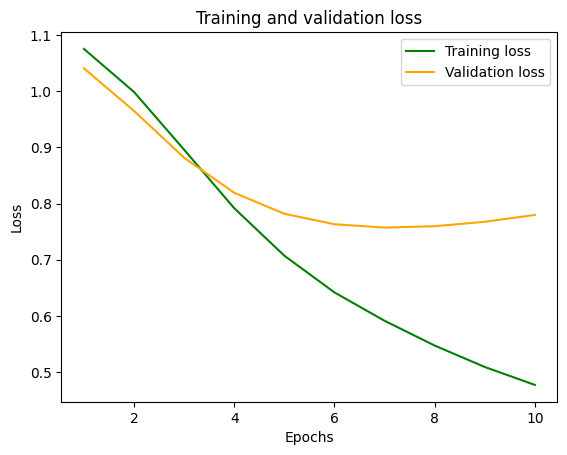

In [58]:
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, color = "green", label = "Training loss")

plt.plot(epochs, val_loss, color = "orange", label = "Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

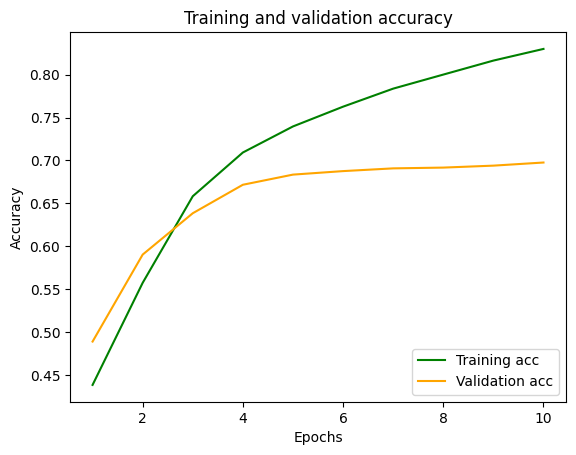

In [59]:
plt.plot(epochs, acc, color = "green", label = "Training acc")
plt.plot(epochs, val_acc, color = "orange", label = "Validation acc")

plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")

plt.show()

In [60]:
export_model = Sequential([
  count_vectorizer,
  dnn_model
])

export_model.compile(
    loss = losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = optimizers.Adam(learning_rate = 0.0001),
    metrics = ["accuracy"]
)

# Test it with `raw_test_ds`, which yields raw strings
loss, accuracy = export_model.evaluate(raw_test_ds)
print(accuracy)

43/43 [==============================] - 0s 6ms/step - loss: 0.7972 - accuracy: 0.6818
0.681768536567688


In [61]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,\
                            classification_report

predictions = export_model.predict(X_test["text"].values)

y_pred = np.argmax(predictions , axis = 1)
y_test = X_test["sentiment"]

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average = None)
precision = precision_score(y_test, y_pred, average = None)
recall = recall_score(y_test, y_pred, average = None)

# Get the classification report
report = classification_report(y_test,y_pred)

# Print the classification report
print(report)

172/172 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.70      0.61      0.65      1556
           1       0.63      0.71      0.67      2223
           2       0.74      0.71      0.72      1717

    accuracy                           0.68      5496
   macro avg       0.69      0.68      0.68      5496
weighted avg       0.69      0.68      0.68      5496



In [62]:
vocab_size = 30

tfidf_vectorizer = layers.TextVectorization(
    standardize = "lower_and_strip_punctuation",
    max_tokens = vocab_size,
    output_mode = "tf-idf",
)

In [63]:
text = ["Malcolm is an amazing painter. Malcolm also loves watching cricket",
        "Dean cooks well",
        "Malcolm is a decent footballer too",
        "Chris is a teacher, he is quite experienced in teaching"]

In [64]:
tfidf_vectorizer.adapt(text)

In [65]:
tfidf_vectorizer.get_vocabulary()

['[UNK]',
 'is',
 'malcolm',
 'a',
 'well',
 'watching',
 'too',
 'teaching',
 'teacher',
 'quite',
 'painter',
 'loves',
 'in',
 'he',
 'footballer',
 'experienced',
 'decent',
 'dean',
 'cricket',
 'cooks',
 'chris',
 'an',
 'amazing',
 'also']

In [66]:
tfidf_vectorizer(text)

<tf.Tensor: shape=(4, 24), dtype=float32, numpy=
array([[0.        , 0.6931472 , 1.6945957 , 0.        , 0.        ,
        1.0986123 , 0.        , 0.        , 0.        , 0.        ,
        1.0986123 , 1.0986123 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.0986123 , 0.        ,
        0.        , 1.0986123 , 1.0986123 , 1.0986123 ],
       [0.        , 0.        , 0.        , 0.        , 1.0986123 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.0986123 , 0.        , 1.0986123 ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.6931472 , 0.84729785, 0.84729785, 0.        ,
        0.        , 1.0986123 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.0986123 ,
        0.        , 1.0986123 , 0.        , 0.        , 0.        ,
        0.        , 0

In [67]:
vocab_size = 10000

tfidf_vectorizer = layers.TextVectorization(
    standardize = custom_standardization,
    max_tokens = vocab_size,
    output_mode = "tf-idf",
    ngrams = (1, 2)
)

tfidf_vectorizer.adapt(train_text)

In [68]:
tfidf_vectorizer.get_vocabulary()

['[UNK]',
 'day',
 'good',
 'get',
 'like',
 'go',
 'today',
 'love',
 'going',
 'work',
 'got',
 'one',
 'time',
 'lol',
 'know',
 'happy',
 'u',
 'really',
 'back',
 'im',
 'see',
 'night',
 'new',
 'home',
 'think',
 'want',
 'well',
 'oh',
 'much',
 'still',
 'thanks',
 'miss',
 'great',
 'last',
 'need',
 'morning',
 'haha',
 'hope',
 'would',
 'feel',
 'fun',
 'tomorrow',
 'sorry',
 'twitter',
 'wish',
 'bad',
 'make',
 'tonight',
 'sad',
 'right',
 'week',
 'yeah',
 'nice',
 'way',
 'mother',
 'gonna',
 'though',
 'better',
 'sleep',
 'could',
 'weekend',
 'come',
 'next',
 'people',
 'bed',
 'getting',
 'mothers',
 'wait',
 'watching',
 'mother day',
 'hate',
 'days',
 'say',
 'awesome',
 'thing',
 'school',
 'dont',
 'even',
 'mom',
 'soon',
 'yes',
 'long',
 'little',
 'show',
 'best',
 'working',
 'sure',
 'never',
 'ok',
 'thank',
 'done',
 'mothers day',
 'tired',
 'hey',
 'cool',
 'feeling',
 'take',
 'cant',
 'happy mother',
 'everyone',
 'look',
 'first',
 'please',
 'l

In [69]:
def vectorize_text(text, label):
    text = tf.expand_dims(text, -1)
    return tfidf_vectorizer(text), label

In [70]:
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

In [71]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [72]:
dnn_model = Sequential([
    layers.Dense(64, activation = "tanh"),
    layers.Dropout(0.1),
    layers.Dense(32, activation = "tanh"),
    layers.Dropout(0.1),
    layers.Dense(3)
])

dnn_model.compile(
    loss = losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = optimizers.Adam(learning_rate = 0.00001),
    metrics = ["accuracy"]
)

history = dnn_model.fit(
    train_ds,
    epochs = 40,
    validation_data = val_ds
)

Epoch 1/40
155/155 [==============================] - 4s 20ms/step - loss: 1.1431 - accuracy: 0.3607 - val_loss: 1.0923 - val_accuracy: 0.3988
Epoch 2/40
155/155 [==============================] - 2s 12ms/step - loss: 1.1154 - accuracy: 0.3842 - val_loss: 1.0712 - val_accuracy: 0.4284
Epoch 3/40
155/155 [==============================] - 2s 11ms/step - loss: 1.0826 - accuracy: 0.4196 - val_loss: 1.0520 - val_accuracy: 0.4538
Epoch 4/40
155/155 [==============================] - 2s 11ms/step - loss: 1.0609 - accuracy: 0.4430 - val_loss: 1.0340 - val_accuracy: 0.4798
Epoch 5/40
155/155 [==============================] - 2s 13ms/step - loss: 1.0372 - accuracy: 0.4703 - val_loss: 1.0166 - val_accuracy: 0.5034
Epoch 6/40
155/155 [==============================] - 2s 11ms/step - loss: 1.0148 - accuracy: 0.4946 - val_loss: 1.0000 - val_accuracy: 0.5175
Epoch 7/40
155/155 [==============================] - 2s 11ms/step - loss: 0.9929 - accuracy: 0.5182 - val_loss: 0.9842 - val_accuracy: 0.5380

In [73]:
loss, accuracy = dnn_model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

43/43 [==============================] - 0s 7ms/step - loss: 0.8072 - accuracy: 0.6601
Loss:  0.8072245121002197
Accuracy:  0.66011643409729


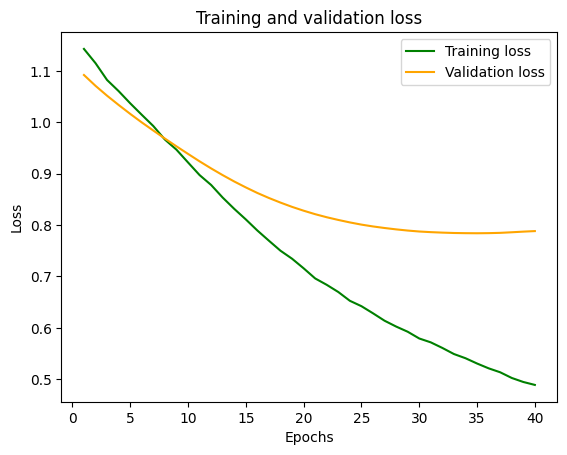

In [74]:
history_dict = history.history
history_dict.keys()

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, color = "green", label = "Training loss")

plt.plot(epochs, val_loss, color = "orange", label = "Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

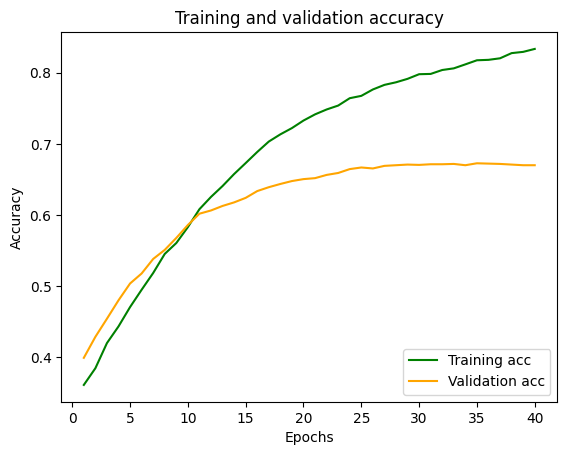

In [75]:
plt.plot(epochs, acc, color = "green", label = "Training acc")
plt.plot(epochs, val_acc, color = "orange", label = "Validation acc")

plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")

plt.show()

In [76]:
export_model = Sequential([
  tfidf_vectorizer,
  dnn_model
])

export_model.compile(
    loss = losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = optimizers.Adam(learning_rate = 0.00001),
    metrics = ["accuracy"]
)

# Test it with `raw_test_ds`, which yields raw strings
loss, accuracy = export_model.evaluate(raw_test_ds)
print(accuracy)

43/43 [==============================] - 1s 7ms/step - loss: 0.8072 - accuracy: 0.6601
0.66011643409729


In [77]:
vocab_size = 10000
sequence_length = 250

vectorize_layer = layers.TextVectorization(
    standardize = custom_standardization,
    max_tokens = vocab_size,
    output_mode = "int",
    output_sequence_length = sequence_length
)

In [78]:
# Make a text-only dataset (without labels), then call adapt
train_text = raw_train_ds.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

In [79]:
def vectorize_text(text, label):
    text = tf.expand_dims(text, -1)
    return vectorize_layer(text), label

In [80]:
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

In [81]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [82]:
callback_list = [
    keras.callbacks.EarlyStopping(
        patience = 3,
        monitor = "val_accuracy"
    ),

    keras.callbacks.ReduceLROnPlateau(
        patience = 1,
        factor = 0.1,
    )
]

In [83]:
embedding_dim = 64

model = Sequential([
  layers.Embedding(input_dim = vocab_size, output_dim = embedding_dim),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dense(64, activation = "tanh"),
  layers.Dropout(0.1),
  layers.Dense(32, activation = "tanh"),
  layers.Dropout(0.1),
  layers.Dense(3)]
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          640000    
                                                                 
 dropout_4 (Dropout)         (None, None, 64)          0         
                                                                 
 global_average_pooling1d (  (None, 64)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                      

In [84]:
model.compile(optimizer = optimizers.Adam(learning_rate = 0.001),
               loss = losses.SparseCategoricalCrossentropy(from_logits = True),
               metrics = ["accuracy"])

history = model.fit(
    train_ds,
    epochs = 50,
    validation_data = val_ds,
    callbacks = callback_list
)

Epoch 1/50
155/155 [==============================] - 4s 25ms/step - loss: 1.0871 - accuracy: 0.4034 - val_loss: 1.0849 - val_accuracy: 0.4043 - lr: 0.0010
Epoch 2/50
155/155 [==============================] - 3s 20ms/step - loss: 1.0628 - accuracy: 0.4341 - val_loss: 0.9988 - val_accuracy: 0.5002 - lr: 0.0010
Epoch 3/50
155/155 [==============================] - 3s 21ms/step - loss: 0.8331 - accuracy: 0.6302 - val_loss: 0.8032 - val_accuracy: 0.6467 - lr: 0.0010
Epoch 4/50
155/155 [==============================] - 4s 25ms/step - loss: 0.7107 - accuracy: 0.7061 - val_loss: 0.7829 - val_accuracy: 0.6808 - lr: 0.0010
Epoch 5/50
155/155 [==============================] - 3s 22ms/step - loss: 0.6647 - accuracy: 0.7357 - val_loss: 0.7825 - val_accuracy: 0.6826 - lr: 0.0010
Epoch 6/50
155/155 [==============================] - 4s 23ms/step - loss: 0.6212 - accuracy: 0.7603 - val_loss: 0.7941 - val_accuracy: 0.6858 - lr: 0.0010
Epoch 7/50
155/155 [==============================] - 4s 26ms/st

In [85]:
loss, accuracy = model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

43/43 [==============================] - 0s 3ms/step - loss: 0.7946 - accuracy: 0.6971
Loss:  0.794577419757843
Accuracy:  0.6970524191856384


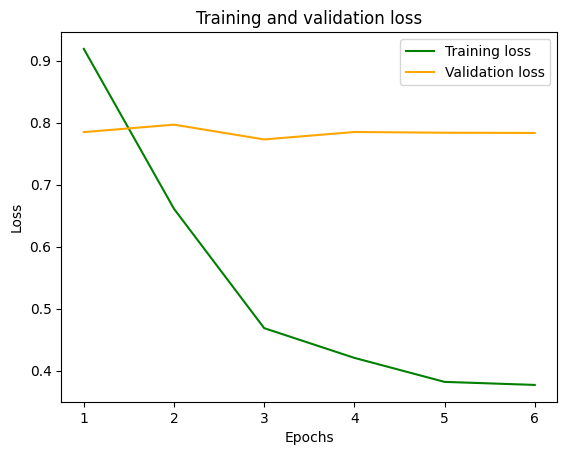

In [92]:
history_dict = history.history
history_dict.keys()

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, len(acc) + 1)


plt.plot(epochs, loss, color = "green", label = "Training loss")

plt.plot(epochs, val_loss, color = "orange", label = "Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

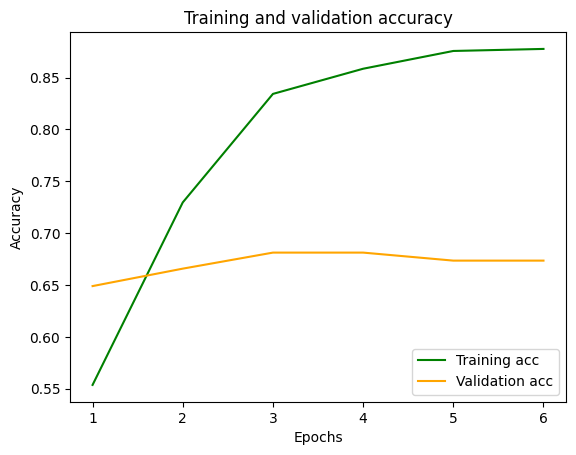

In [93]:
plt.plot(epochs, acc, color = "green", label = "Training acc")
plt.plot(epochs, val_acc, color = "orange", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")

plt.show()

In [94]:
embedding_dim = 128

rnn_model = Sequential()

rnn_model.add(layers.Embedding(input_dim = vocab_size, output_dim = embedding_dim))

rnn_model.add(layers.SimpleRNN(128, return_sequences = True))

rnn_model.add(layers.GlobalMaxPool1D())

rnn_model.add(layers.Dense(3, activation = "softmax"))

rnn_model.compile(optimizer = optimizers.Adam(learning_rate = 0.001),
               loss = losses.SparseCategoricalCrossentropy(from_logits = False),
               metrics = ["accuracy"])

history = rnn_model.fit(
    train_ds,
    epochs = 20,
    validation_data = val_ds, callbacks = callback_list)

Epoch 1/20
155/155 [==============================] - 42s 264ms/step - loss: 0.9377 - accuracy: 0.5472 - val_loss: 0.8294 - val_accuracy: 0.6380 - lr: 0.0010
Epoch 2/20
155/155 [==============================] - 39s 249ms/step - loss: 0.7992 - accuracy: 0.6519 - val_loss: 0.8325 - val_accuracy: 0.6453 - lr: 0.0010
Epoch 3/20
155/155 [==============================] - 42s 272ms/step - loss: 0.6498 - accuracy: 0.7511 - val_loss: 0.7679 - val_accuracy: 0.6671 - lr: 1.0000e-04
Epoch 4/20
155/155 [==============================] - 52s 336ms/step - loss: 0.5801 - accuracy: 0.7791 - val_loss: 0.7596 - val_accuracy: 0.6771 - lr: 1.0000e-04
Epoch 5/20
155/155 [==============================] - 35s 228ms/step - loss: 0.5402 - accuracy: 0.8004 - val_loss: 0.7623 - val_accuracy: 0.6817 - lr: 1.0000e-04
Epoch 6/20
155/155 [==============================] - 46s 294ms/step - loss: 0.5072 - accuracy: 0.8181 - val_loss: 0.7617 - val_accuracy: 0.6799 - lr: 1.0000e-05
Epoch 7/20
155/155 [================

In [95]:
loss, accuracy = rnn_model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

43/43 [==============================] - 4s 88ms/step - loss: 0.7776 - accuracy: 0.6812
Loss:  0.7776458859443665
Accuracy:  0.6812227368354797


In [97]:
embedding_dim = 128

lstm_model = Sequential()

lstm_model.add(layers.Embedding(input_dim = vocab_size, output_dim = embedding_dim))

lstm_model.add(layers.SpatialDropout1D(0.25))

lstm_model.add(layers.LSTM(128, dropout=0.6, return_sequences = True))

lstm_model.add(layers.GlobalMaxPool1D())

lstm_model.add(layers.Dense(32, activation = "tanh"))
lstm_model.add(layers.Dense(3, activation = "softmax"))

lstm_model.compile(optimizer = optimizers.Adam(learning_rate = 0.001),
               loss = losses.SparseCategoricalCrossentropy(from_logits = False),
               metrics = ["accuracy"])

history = lstm_model.fit(
    train_ds,
    epochs = 20,
    validation_data = val_ds, callbacks = callback_list)

Epoch 1/20
155/155 [==============================] - 106s 676ms/step - loss: 0.9680 - accuracy: 0.5263 - val_loss: 0.7879 - val_accuracy: 0.6598 - lr: 0.0010
Epoch 2/20
155/155 [==============================] - 102s 655ms/step - loss: 0.7235 - accuracy: 0.6969 - val_loss: 0.7361 - val_accuracy: 0.6980 - lr: 0.0010
Epoch 3/20
155/155 [==============================] - 105s 676ms/step - loss: 0.6372 - accuracy: 0.7425 - val_loss: 0.7247 - val_accuracy: 0.7049 - lr: 0.0010
Epoch 4/20
155/155 [==============================] - 103s 663ms/step - loss: 0.5722 - accuracy: 0.7757 - val_loss: 0.7359 - val_accuracy: 0.7071 - lr: 0.0010
Epoch 5/20
155/155 [==============================] - 102s 658ms/step - loss: 0.4948 - accuracy: 0.8145 - val_loss: 0.7564 - val_accuracy: 0.7044 - lr: 1.0000e-04
Epoch 6/20
155/155 [==============================] - 100s 644ms/step - loss: 0.4822 - accuracy: 0.8216 - val_loss: 0.7562 - val_accuracy: 0.7021 - lr: 1.0000e-05
Epoch 7/20
155/155 [==================

In [98]:
loss, accuracy = lstm_model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

43/43 [==============================] - 9s 202ms/step - loss: 0.7802 - accuracy: 0.6969
Loss:  0.7801645994186401
Accuracy:  0.6968704462051392


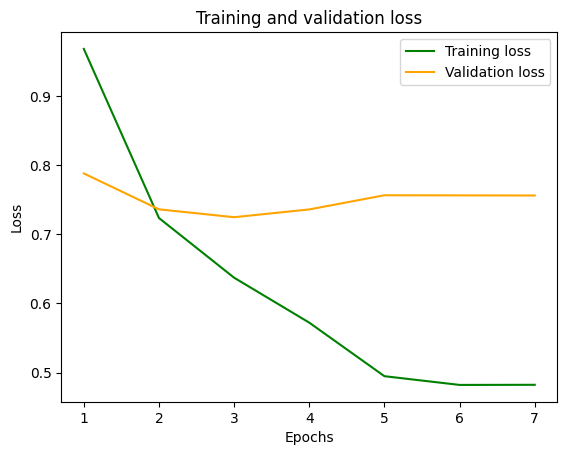

In [99]:
history_dict = history.history
history_dict.keys()

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, len(acc) + 1)


plt.plot(epochs, loss, color = "green", label = "Training loss")

plt.plot(epochs, val_loss, color = "orange", label = "Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

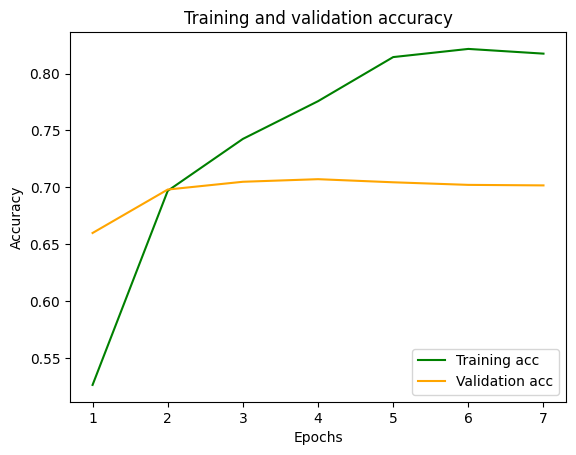

In [100]:
plt.plot(epochs, acc, color = "green", label = "Training acc")
plt.plot(epochs, val_acc, color = "orange", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")

plt.show()

In [101]:
export_model = Sequential([
  vectorize_layer,
  lstm_model
])

export_model.compile(
    loss = losses.SparseCategoricalCrossentropy(from_logits = False),
    optimizer = optimizers.Adam(learning_rate = 0.001),
    metrics = ["accuracy"]
)

# Test it with `raw_test_ds`, which yields raw strings
loss, accuracy = export_model.evaluate(raw_test_ds)
print(accuracy)

43/43 [==============================] - 10s 206ms/step - loss: 0.7802 - accuracy: 0.6969
0.6968704462051392


In [102]:
examples = [
  "this experience has been the worst, want my money back",
  "this AI related article is very good",
  "The movie was average" ]

export_model.predict(examples)

1/1 [==============================] - 0s 397ms/step


array([[0.96256936, 0.0359755 , 0.00145516],
       [0.00957137, 0.07874855, 0.91168004],
       [0.18999007, 0.76724195, 0.04276799]], dtype=float32)

In [103]:
np.argmax(export_model.predict(examples), axis=1)

1/1 [==============================] - 0s 44ms/step


array([0, 2, 1])

In [104]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,\
                            classification_report

predictions = export_model.predict(X_test["text"].values)
y_pred = np.argmax(predictions , axis = 1)

y_test = X_test["sentiment"]
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average = None)
precision = precision_score(y_test,y_pred, average = None)
recall = recall_score(y_test,y_pred, average = None)

# Get the classification report
report = classification_report(y_test,y_pred)

# Print the classification report
print(report)

172/172 [==============================] - 14s 80ms/step
              precision    recall  f1-score   support

           0       0.71      0.63      0.67      1556
           1       0.66      0.70      0.68      2223
           2       0.73      0.75      0.74      1717

    accuracy                           0.70      5496
   macro avg       0.70      0.69      0.70      5496
weighted avg       0.70      0.70      0.70      5496



In [105]:
lstm_model.save("sentiment_predictor.keras")

In [107]:
# Loading the saved model
loaded_model = models.load_model("sentiment_predictor.keras")
loss, accuracy = loaded_model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

43/43 [==============================] - 9s 186ms/step - loss: 0.7802 - accuracy: 0.6969
Loss:  0.7801645994186401
Accuracy:  0.6968704462051392
